# Rf 2 0 5_Compplot
Addition and convolution: options for plotting components of composite p.d.f.s.



**Author:** 07/2008 - Wouter Verkerke  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:44 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooDataSet.h"
#include "RooGaussian.h"
#include "RooAddPdf.h"
#include "RooChebychev.h"
#include "RooExponential.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "RooPlot.h"

In [2]:
%%cpp -d
// This is a workaround to make sure the namespace is used inside functions
using namespace RooFit;

Setup composite  pdf
 --------------------------------------

Declare observable x

In [3]:
RooRealVar x("x", "x", 0, 10);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create two gaussian pdfs g1(x,mean1,sigma) anf g2(x,mean2,sigma) and their parameters

In [4]:
RooRealVar mean("mean", "mean of gaussians", 5);
RooRealVar sigma1("sigma1", "width of gaussians", 0.5);
RooRealVar sigma2("sigma2", "width of gaussians", 1);
RooGaussian sig1("sig1", "Signal component 1", x, mean, sigma1);
RooGaussian sig2("sig2", "Signal component 2", x, mean, sigma2);

Sum the signal components into a composite signal p.d.f.

In [5]:
RooRealVar sig1frac("sig1frac", "fraction of component 1 in signal", 0.8, 0., 1.);
RooAddPdf sig("sig", "Signal", RooArgList(sig1, sig2), sig1frac);

Build chebychev polynomial p.d.f.

In [6]:
RooRealVar a0("a0", "a0", 0.5, 0., 1.);
RooRealVar a1("a1", "a1", 0.2, 0., 1.);
RooChebychev bkg1("bkg1", "Background 1", x, RooArgSet(a0, a1));

Build exponential pdf

In [7]:
RooRealVar alpha("alpha", "alpha", -1);
RooExponential bkg2("bkg2", "Background 2", x, alpha);

Sum the background components into a composite background p.d.f.

In [8]:
RooRealVar bkg1frac("sig1frac", "fraction of component 1 in background", 0.2, 0., 1.);
RooAddPdf bkg("bkg", "Signal", RooArgList(bkg1, bkg2), sig1frac);

Sum the composite signal and background

In [9]:
RooRealVar bkgfrac("bkgfrac", "fraction of background", 0.5, 0., 1.);
RooAddPdf model("model", "g1+g2+a", RooArgList(bkg, sig), bkgfrac);

Setup basic plot with data and full pdf
 ------------------------------------------------------------------------------

Generate a data sample of 1000 events in x from model

In [10]:
RooDataSet *data = model.generate(x, 1000);

Plot data and complete pdf overlaid

In [11]:
RooPlot *xframe = x.frame(Title("Component plotting of pdf=(sig1+sig2)+(bkg1+bkg2)"));
data->plotOn(xframe);
model.plotOn(xframe);

Clone xframe for use below

In [12]:
RooPlot *xframe2 = (RooPlot *)xframe->Clone("xframe2");

Make component by object reference
 --------------------------------------------------------------------

Plot single background component specified by object reference

In [13]:
model.plotOn(xframe, Components(bkg), LineColor(kRed));

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (bkg1,bkg2)


Plot single background component specified by object reference

In [14]:
model.plotOn(xframe, Components(bkg2), LineStyle(kDashed), LineColor(kRed));

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (bkg)


Plot multiple background components specified by object reference
 Note that specified components may occur at any level in object tree
 (e.g bkg is component of 'model' and 'sig2' is component 'sig')

In [15]:
model.plotOn(xframe, Components(RooArgSet(bkg, sig2)), LineStyle(kDotted));

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg,sig2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (bkg1,bkg2,sig)


Make component by name / regexp
 ------------------------------------------------------------

Plot single background component specified by name

In [16]:
model.plotOn(xframe2, Components("bkg"), LineColor(kCyan));

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (bkg1,bkg2)


Plot multiple background components specified by name

In [17]:
model.plotOn(xframe2, Components("bkg1,sig2"), LineStyle(kDotted), LineColor(kCyan));

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg1,sig2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (bkg,sig)


Plot multiple background components specified by regular expression on name

In [18]:
model.plotOn(xframe2, Components("sig*"), LineStyle(kDashed), LineColor(kCyan));

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (sig,sig1,sig2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Plot multiple background components specified by multiple regular expressions on name

In [19]:
model.plotOn(xframe2, Components("bkg1,sig*"), LineStyle(kDashed), LineColor(kYellow), Invisible());

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg1,sig,sig1,sig2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (bkg)


Draw the frame on the canvas

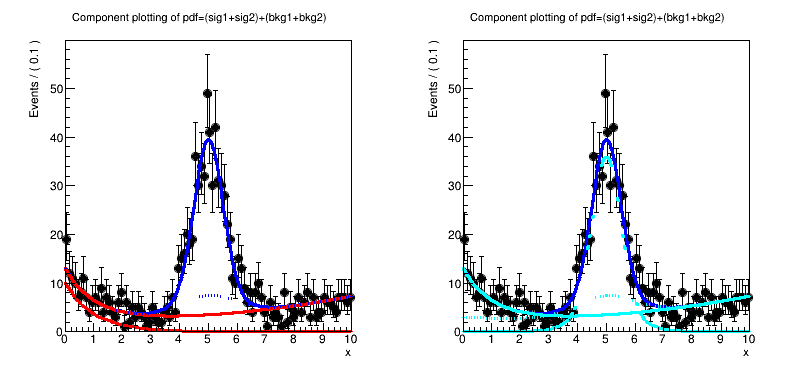

In [20]:
TCanvas *c = new TCanvas("rf205_compplot", "rf205_compplot", 800, 400);
c->Divide(2);
c->cd(1);
gPad->SetLeftMargin(0.15);
xframe->GetYaxis()->SetTitleOffset(1.4);
xframe->Draw();
c->cd(2);
gPad->SetLeftMargin(0.15);
xframe2->GetYaxis()->SetTitleOffset(1.4);
xframe2->Draw();
c->Draw();